In [64]:
import pandas as pd
import yfinance as yf

# Define the symbols for Nvidia, Intel, and AMD
symbols = ['AMD', 'INTC', 'NVDA']

# Calculate the end date as today
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Calculate the start date as 10 years before the end date
start_date = (pd.Timestamp.today() - pd.DateOffset(years=10)).strftime('%Y-%m-%d')

# Fetch historical stock data
stock_data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Create a DataFrame for the portfolio
portfolio_df = pd.DataFrame(stock_data)

# Rename columns to include stock symbols
portfolio_df.columns = symbols

# Add a column for the number of shares (1000 shares for each stock)
portfolio_df['Shares_AMD'] = 1000
portfolio_df['Shares_INTC'] = 1000
portfolio_df['Shares_NVDA'] = 1000

# Calculate the value of the portfolio in USD
portfolio_df['Portfolio_Value'] = (portfolio_df['AMD'] * portfolio_df['Shares_AMD'] +
                                       portfolio_df['INTC'] * portfolio_df['Shares_INTC'] +
                                       portfolio_df['NVDA'] * portfolio_df['Shares_NVDA'])

# Calculate the value of the portfolio in USD
portfolio_df['Portfolio_Close_Price'] = ((portfolio_df['AMD'] * portfolio_df['Shares_AMD'] +
                                       portfolio_df['INTC'] * portfolio_df['Shares_INTC'] +
                                       portfolio_df['NVDA'] * portfolio_df['Shares_NVDA']))/3000

# Round the portfolio value columns to 2 decimal places
portfolio_df = portfolio_df.round({'AMD': 2, 'INTC': 2, 'NVDA': 2, 'Portfolio_Value': 2, 'Portfolio_Close_Price': 2})

# Print the first few rows of the portfolio DataFrame
display(portfolio_df.head())
display(portfolio_df.tail())



[*********************100%%**********************]  3 of 3 completed


,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value,Portfolio_Close_Price
Date,,,,,,,,
2014-03-28,3.88,19.43,4.24,1000,1000,1000,27555.43,9.19
2014-03-31,4.01,19.58,4.24,1000,1000,1000,27831.93,9.28
2014-04-01,4.07,19.72,4.42,1000,1000,1000,28203.78,9.40
2014-04-02,4.06,19.64,4.39,1000,1000,1000,28089.49,9.36
2014-04-03,4.00,20.03,4.44,1000,1000,1000,28471.34,9.49


,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value,Portfolio_Close_Price
Date,,,,,,,,
2024-03-21,178.68,42.42,914.35,1000,1000,1000,1135449.97,378.48
2024-03-22,179.65,42.57,942.89,1000,1000,1000,1165110.01,388.37
2024-03-25,178.63,41.83,950.02,1000,1000,1000,1170480.03,390.16
2024-03-26,177.87,41.99,925.61,1000,1000,1000,1145469.98,381.82
2024-03-27,179.59,43.77,902.50,1000,1000,1000,1125860.00,375.29


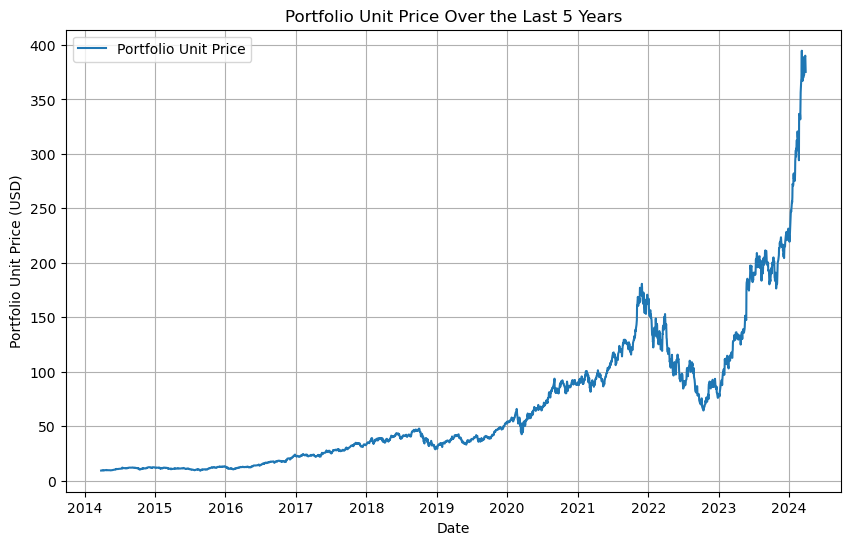

In [65]:
import matplotlib.pyplot as plt

# Plot the portfolio value for the last 5 years
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df.index, portfolio_df['Portfolio_Close_Price'], label='Portfolio Unit Price')
plt.title('Portfolio Unit Price Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Portfolio Unit Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

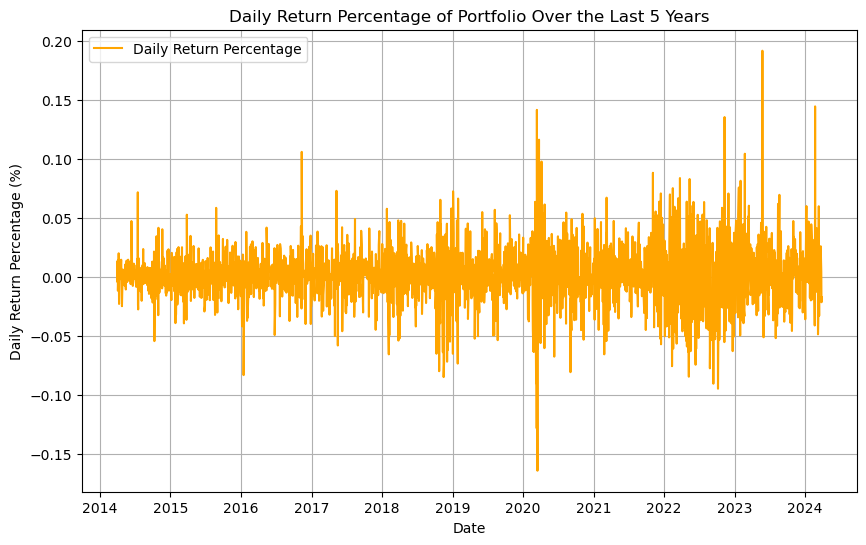

In [66]:
# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Close_Price'].pct_change()

# Plot the daily return percentage for the last 5 years
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df.index, portfolio_df['Daily_Return_Percentage'], label='Daily Return Percentage', color='orange')
plt.title('Daily Return Percentage of Portfolio Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Daily Return Percentage (%)')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# Calculate daily percentage change in portfolio_close_price
portfolio_df['Daily_Return_Close_Price_Percentage'] = portfolio_df['Portfolio_Close_Price'].pct_change()

# Drop NaN values resulting from the calculation
portfolio_df.dropna(inplace=True)

# Print the first few rows of the portfolio DataFrame
portfolio_df

,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value,Portfolio_Close_Price,Daily_Return_Percentage,Daily_Return_Close_Price_Percentage
Date,,,,,,,,,,
2014-03-31,4.01,19.58,4.24,1000,1000,1000,27831.93,9.28,0.009793,0.009793
2014-04-01,4.07,19.72,4.42,1000,1000,1000,28203.78,9.40,0.012931,0.012931
2014-04-02,4.06,19.64,4.39,1000,1000,1000,28089.49,9.36,-0.004255,-0.004255
2014-04-03,4.00,20.03,4.44,1000,1000,1000,28471.34,9.49,0.013889,0.013889
2014-04-04,4.01,19.84,4.30,1000,1000,1000,28154.29,9.38,-0.011591,-0.011591
...,...,...,...,...,...,...,...,...,...,...
2024-03-21,178.68,42.42,914.35,1000,1000,1000,1135449.97,378.48,0.008688,0.008688
2024-03-22,179.65,42.57,942.89,1000,1000,1000,1165110.01,388.37,0.026131,0.026131
2024-03-25,178.63,41.83,950.02,1000,1000,1000,1170480.03,390.16,0.004609,0.004609


In [68]:
portfolio_df.columns

Index(['AMD', 'INTC', 'NVDA', 'Shares_AMD', 'Shares_INTC', 'Shares_NVDA',
       'Portfolio_Value', 'Portfolio_Close_Price', 'Daily_Return_Percentage',
       'Daily_Return_Close_Price_Percentage'],
      dtype='object')

In [38]:
from tsfresh import extract_features

# Reset index to have a unique identifier for each timestamp
portfolio_df.reset_index(inplace=True)

# Extract features
extracted_features = extract_features(portfolio_df, column_id='Date')

# Print the extracted features
print(extracted_features.head())

Feature Extraction: 100%|██████████| 20/20 [06:50<00:00, 20.51s/it]


            index__variance_larger_than_standard_deviation  \
2014-04-10                                             0.0   
2014-04-11                                             0.0   
2014-04-14                                             0.0   
2014-04-15                                             0.0   
2014-04-16                                             0.0   

            index__has_duplicate_max  index__has_duplicate_min  \
2014-04-10                       0.0                       0.0   
2014-04-11                       0.0                       0.0   
2014-04-14                       0.0                       0.0   
2014-04-15                       0.0                       0.0   
2014-04-16                       0.0                       0.0   

            index__has_duplicate  index__sum_values  index__abs_energy  \
2014-04-10                   0.0                0.0                0.0   
2014-04-11                   0.0                1.0                1.0   
2014-04-

In [39]:
extracted_features.head()

,index__variance_larger_than_standard_deviation,index__has_duplicate_max,index__has_duplicate_min,index__has_duplicate,index__sum_values,index__abs_energy,index__mean_abs_change,index__mean_change,index__mean_second_derivative_central,index__median,...,Rolling_Std__fourier_entropy__bins_5,Rolling_Std__fourier_entropy__bins_10,Rolling_Std__fourier_entropy__bins_100,Rolling_Std__permutation_entropy__dimension_3__tau_1,Rolling_Std__permutation_entropy__dimension_4__tau_1,Rolling_Std__permutation_entropy__dimension_5__tau_1,Rolling_Std__permutation_entropy__dimension_6__tau_1,Rolling_Std__permutation_entropy__dimension_7__tau_1,Rolling_Std__query_similarity_count__query_None__threshold_0.0,Rolling_Std__mean_n_absolute_max__number_of_maxima_7
2014-04-10,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-11,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-14,0.0,0.0,0.0,0.0,2.0,4.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-15,0.0,0.0,0.0,0.0,3.0,9.0,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-16,0.0,0.0,0.0,0.0,4.0,16.0,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Remove columns with null values
extracted_features = extracted_features.dropna(axis=1)

# Remove columns with zero variance
extracted_features = extracted_features.loc[:, extracted_features.std() > 0]

extracted_features.head()

,index__sum_values,index__abs_energy,index__median,index__mean,index__root_mean_square,index__maximum,index__absolute_maximum,index__minimum,index__quantile__q_0.1,index__quantile__q_0.2,...,Rolling_Std__quantile__q_0.6,Rolling_Std__quantile__q_0.7,Rolling_Std__quantile__q_0.8,Rolling_Std__quantile__q_0.9,"Rolling_Std__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","Rolling_Std__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","Rolling_Std__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Rolling_Std__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","Rolling_Std__fft_coefficient__attr_""real""__coeff_0","Rolling_Std__fft_coefficient__attr_""abs""__coeff_0"
2014-04-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014741,0.014741,0.014741,0.014741,0.009041,0.005718,0.004043,0.002859,0.014741,0.014741
2014-04-11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.015964,0.015964,0.015964,0.015964,0.009790,0.006192,0.004378,0.003096,0.015964,0.015964
2014-04-14,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.015985,0.015985,0.015985,0.015985,0.009804,0.006200,0.004384,0.003100,0.015985,0.015985
2014-04-15,3.0,9.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.015703,0.015703,0.015703,0.015703,0.009630,0.006091,0.004307,0.003045,0.015703,0.015703
2014-04-16,4.0,16.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.015642,0.015642,0.015642,0.015642,0.009593,0.006067,0.004290,0.003034,0.015642,0.015642


In [89]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np


# Feature Extraction
portfolio_df['Previous_Return'] = portfolio_df['Daily_Return_Percentage'].shift(1)
portfolio_df['Rolling_Mean'] = portfolio_df['Daily_Return_Percentage'].rolling(window=7).mean()
portfolio_df['Rolling_Std'] = portfolio_df['Daily_Return_Percentage'].rolling(window=7).std()

# Drop NaN values resulting from rolling calculations and lagged values
portfolio_df.dropna(inplace=True)

# Define the testing days (every 4th day)
# testing_days = portfolio_df.index[::4]

# Define the testing days (every 5th day)
testing_days = portfolio_df.index[::5]

# Split data into training and testing sets based on testing days
train_df = portfolio_df[~portfolio_df.index.isin(testing_days)]
test_df = portfolio_df[portfolio_df.index.isin(testing_days)]

# Prepare data for machine learning
X_train = train_df[['Previous_Return', 'Rolling_Mean', 'Rolling_Std']]
y_train = train_df['Daily_Return_Percentage']
X_test = test_df[['Previous_Return', 'Rolling_Mean', 'Rolling_Std']]
y_test = test_df['Daily_Return_Percentage']

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate R^2 score
r2_score = model.score(X_test, y_test)
print("R^2 Score:", r2_score)

# Evaluate model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Predict future daily return percentages for the next 30 days
last_features = X_train.tail(1)
next_30_days = pd.date_range(start=portfolio_df.index[-1], periods=30, freq='D')
future_features = pd.DataFrame(index=next_30_days, columns=X_train.columns)
future_features.iloc[0] = last_features.values[0]

for i in range(1, 30):
    future_features.iloc[i] = np.concatenate(([future_features.iloc[i - 1][0]], np.random.rand(2)))

future_predictions = model.predict(future_features)
print("Future Predictions for the next 30 days:")
print(future_predictions)


R^2 Score: 0.1737436158966651
Mean Absolute Error: 1.5301281942507938
Future Predictions for the next 30 days:
[0.61458941 0.71595758 0.34060967 1.0325258  1.2973092  1.0281262
 0.95326658 1.23725305 1.43917941 0.58022504 0.63344041 0.47501857
 0.84738376 1.02194948 0.92326431 0.90787419 1.38815505 1.19028914
 1.15944438 0.84431353 0.74822758 1.43825011 0.47971771 1.34421801
 1.49433848 1.48004535 1.20965537 0.3040343  0.54442306 0.94430801]


In [90]:
future_predictions

array([0.61458941, 0.71595758, 0.34060967, 1.0325258 , 1.2973092 ,
       1.0281262 , 0.95326658, 1.23725305, 1.43917941, 0.58022504,
       0.63344041, 0.47501857, 0.84738376, 1.02194948, 0.92326431,
       0.90787419, 1.38815505, 1.19028914, 1.15944438, 0.84431353,
       0.74822758, 1.43825011, 0.47971771, 1.34421801, 1.49433848,
       1.48004535, 1.20965537, 0.3040343 , 0.54442306, 0.94430801])

In [91]:
portfolio_df

,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value,Portfolio_Close_Price,Daily_Return_Percentage,Daily_Return_Close_Price_Percentage,Previous_Return,Rolling_Mean,Rolling_Std
Date,,,,,,,,,,,,,
2014-04-17,3.69,20.51,4.40,1000,1000,1000,28598.97,9.53,0.105114,0.001050,0.354256,-0.127677,1.334510
2014-04-21,4.12,20.44,4.43,1000,1000,1000,28996.23,9.67,1.389071,0.014690,0.105114,0.051776,1.454459
2014-04-22,4.30,20.36,4.47,1000,1000,1000,29130.69,9.71,0.463715,0.004137,1.389071,0.442281,1.033210
2014-04-23,4.25,20.29,4.52,1000,1000,1000,29064.54,9.69,-0.227080,-0.002060,0.463715,0.637999,0.635864
2014-04-24,4.28,20.29,4.56,1000,1000,1000,29134.82,9.71,0.241807,0.002064,-0.227080,0.469250,0.542721
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,178.68,42.42,914.35,1000,1000,1000,1135449.97,378.48,0.870608,0.008688,0.733813,-0.381919,1.549108
2024-03-22,179.65,42.57,942.89,1000,1000,1000,1165110.01,388.37,2.612184,0.026131,0.870608,0.238866,1.771966
2024-03-25,178.63,41.83,950.02,1000,1000,1000,1170480.03,390.16,0.460902,0.004609,2.612184,0.773676,0.864529


In [92]:
portfolio_df.columns

Index(['AMD', 'INTC', 'NVDA', 'Shares_AMD', 'Shares_INTC', 'Shares_NVDA',
       'Portfolio_Value', 'Portfolio_Close_Price', 'Daily_Return_Percentage',
       'Daily_Return_Close_Price_Percentage', 'Previous_Return',
       'Rolling_Mean', 'Rolling_Std'],
      dtype='object')

In [93]:
from prophet import Prophet

# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Value'].pct_change() * 100

# Drop NaN values resulting from the calculation
portfolio_df.dropna(inplace=True)

# Prepare data for Prophet
prophet_df = portfolio_df.reset_index()[['Date', 'Daily_Return_Percentage']].rename(columns={'Date': 'ds', 'Daily_Return_Percentage': 'y'})

# Fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a DataFrame with future dates for the next 30 days
future_dates = model.make_future_dataframe(periods=30)

# Make predictions using the fitted model
forecast = model.predict(future_dates)

# Extract the predicted values for the next 30 days
predicted_values = forecast[['ds', 'yhat']].tail(30)


21:37:53 - cmdstanpy - INFO - Chain [1] start processing
21:37:53 - cmdstanpy - INFO - Chain [1] done processing


In [94]:
# Display predicted return percentage values for the next 30 days (Prophet)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
2502,2024-03-28,0.488231,-2.527407,3.523628
2503,2024-03-29,0.322023,-2.719137,3.384827
2504,2024-03-30,1.188811,-2.065736,4.163961
2505,2024-03-31,1.168552,-1.846833,4.126282
2506,2024-04-01,0.540621,-2.549378,3.665443
2507,2024-04-02,0.389769,-2.728917,3.434325
2508,2024-04-03,0.330670,-2.735501,3.338532
2509,2024-04-04,0.339900,-2.898555,3.253168
2510,2024-04-05,0.164999,-2.953404,3.226957
2511,2024-04-06,1.025352,-1.924026,4.024371


In [99]:
# Convert the future_predictions array to a DataFrame
future_predictions_df = pd.DataFrame(future_predictions, columns=['LR_Predictions'])

# Concatenate the Prophet predictions DataFrame with the future predictions DataFrame
combined_predictions_df = pd.concat([predicted_values, future_predictions_df], axis=1)

# Set the index of the future_predictions_df DataFrame to match the index of the predicted_values DataFrame
future_predictions_df.index = predicted_values.index

# Concatenate the Prophet predictions DataFrame with the future predictions DataFrame
combined_predictions_df = pd.concat([predicted_values, future_predictions_df], axis=1)

# Print the combined predictions DataFrame
combined_predictions_df.tail(30)


,ds,yhat,LR_Predictions
2502,2024-03-28,0.488231,0.614589
2503,2024-03-29,0.322023,0.715958
2504,2024-03-30,1.188811,0.340610
2505,2024-03-31,1.168552,1.032526
2506,2024-04-01,0.540621,1.297309
2507,2024-04-02,0.389769,1.028126
2508,2024-04-03,0.330670,0.953267
2509,2024-04-04,0.339900,1.237253
2510,2024-04-05,0.164999,1.439179
2511,2024-04-06,1.025352,0.580225


In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Calculate the R^2 score of the model on the testing data
r2_score = rf_model.score(X_test, y_test)
print("R^2 Score:", r2_score)

# Evaluate the model
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Make predictions for future dates
rf_predictions = rf_model.predict(future_features)
print("Future Predictions for the next 30 days:")
print(rf_predictions)


R^2 Score: 0.04611463310535635
Mean Absolute Error: 1.6078665309883962
Future Predictions for the next 30 days:
[-1.04114263  0.52199639  0.06893609  0.67877474  1.44136583  0.60205504
  1.24962066  1.36042746  1.53288178  0.32163516  0.48597254  0.29846449
  1.06056696  0.43950156  1.20926527  1.00409447  1.57544668  1.36042746
  1.34499031  0.38263307  0.40509184  1.44139976  0.3344469   1.47791149
  1.34493557  1.3898041   1.48343232 -0.06171534  0.26324264  1.10740092]


In [101]:
# Convert the future_predictions array to a DataFrame for Random Forest predictions
rf_predictions_df = pd.DataFrame(rf_predictions, index=future_predictions_df.index, columns=['RF_Predictions'])

# Concatenate the Prophet predictions DataFrame with the Random Forest predictions DataFrame
combined_predictions_df = pd.concat([combined_predictions_df, rf_predictions_df], axis=1)

# Print the updated combined predictions DataFrame
combined_predictions_df.tail(30)

,ds,yhat,LR_Predictions,RF_Predictions
2502,2024-03-28,0.488231,0.614589,-1.041143
2503,2024-03-29,0.322023,0.715958,0.521996
2504,2024-03-30,1.188811,0.340610,0.068936
2505,2024-03-31,1.168552,1.032526,0.678775
2506,2024-04-01,0.540621,1.297309,1.441366
2507,2024-04-02,0.389769,1.028126,0.602055
2508,2024-04-03,0.330670,0.953267,1.249621
2509,2024-04-04,0.339900,1.237253,1.360427
2510,2024-04-05,0.164999,1.439179,1.532882
2511,2024-04-06,1.025352,0.580225,0.321635
